In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import t
linmod = LinearRegression()

In [2]:
datafile = '../../dataset/ch20/framingham.txt'
data = pd.read_csv(datafile, sep='\t')

In [3]:
data.head()

,Cholesterol,Age,Sex,SBP,DBP,CIG
0,216,45,MALE,90,50,5.0
1,237,49,MALE,100,64,0.0
2,215,47,MALE,100,70,50.0
3,340,48,MALE,108,70,0.0
4,149,49,MALE,108,75,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cholesterol  1406 non-null   int64  
 1   Age          1406 non-null   int64  
 2   Sex          1406 non-null   object 
 3   SBP          1406 non-null   int64  
 4   DBP          1406 non-null   int64  
 5   CIG          1404 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 66.0+ KB


**Problem 28.**

Cholesterol Does a person’s cholesterol level tend to change with age? Data collected from 1406 adults aged 45 to 62 as part of the Framingham study produced the regression analysis shown. Assuming that the data satisfy the conditions for infer- ence, examine the association between age and cholesterol level. (Data in Framingham)

(a) State the appropriate hypothesis for the slope.

(b) Test your hypothesis and state your conclusion in the proper context.

In [5]:
cholesterol = data['Cholesterol']
age = data['Age']

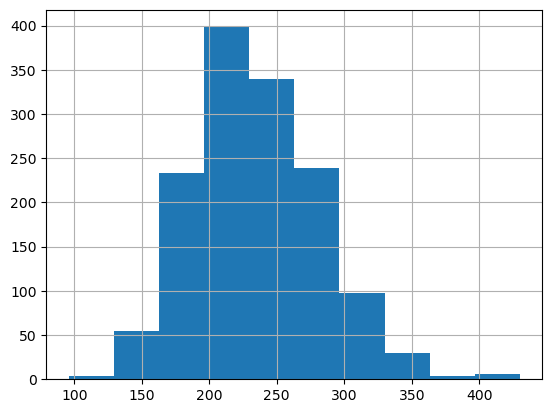

In [6]:
cholesterol.hist();

**Answer to (a):**

$H_0:\beta_1 = 0$; a person's cholesterol level has no association with the person's age. 

$H_0:\beta_1 \neq 0$; a person's cholesterol level does have association with the person's age.

In [7]:
def sol28b():
    age_slope = 0
    age_coffe = 0.771639
    df = 1406 - 2
    SE_coeff = 0.2574
    tscore = (age_coffe - age_slope) / SE_coeff
    pval = (1-t.cdf(tscore, df)) * 2
    print(f"T-score: {tscore:.2f}")
    print(f"P-value: {pval:.4f}")
    
sol28b()

T-score: 3.00
P-value: 0.0028


**Answer to Problem(b)**

We have tested the hypothesis, obtaining a t-score of 3. Such a t-score is very unlikely, as its P-value is 0.0028.  Therefore, it leads us to reject the hypothesis, and we are confident that the coefficient is not zero.  We accept the alternative that a person's cholesterol level has association with the person's age.

**30.** More cholesterol Look again at Exercise 28’s regression 
output for age and cholesterol level. (Data in Framingham)
a) The output reports s = 46.16. Explain what that means  n
this context.
b) What’s the value of the standard error of the slope of the regres ion
line?
c) Explain what that means in this context.

**(a)** $s=46.16$ is the standard error of residuals.  We may use this standard error to estimate the standard deviation of the error term ($e$) in a linear regression analysis ($y = \mu_y + e$, $\mu_y = \beta_0 + \beta_1 \cdot x$).   It means that in general the measured cholesterol level for a certain age deviates by this amount from the mean cholesterol level expected for that age.

In [8]:
cholesterol.std()

46.29046878288453

In [9]:
age = np.array(age).reshape(-1, 1)
linmod.fit(age, cholesterol)

LinearRegression()

In [11]:
cholesterol_hat = linmod.predict(age)

In [12]:
residuals = cholesterol - cholesterol_hat

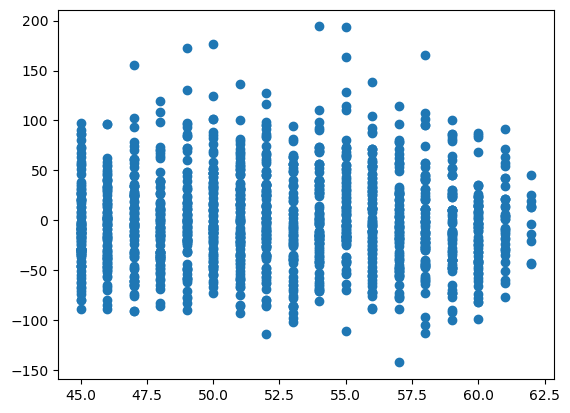

In [15]:
plt.scatter(age, residuals);

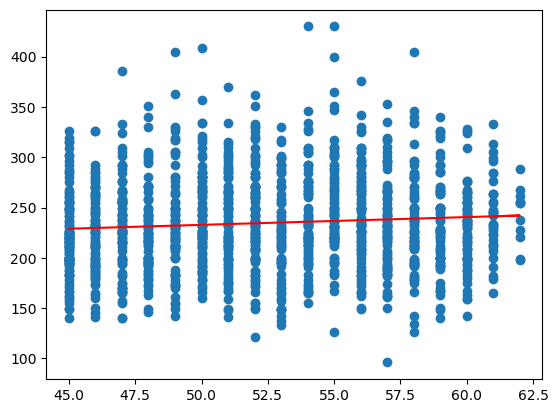

In [17]:
plt.scatter(age, cholesterol)
plt.plot(age, cholesterol_hat, 'r-');

In [18]:
residuals.std()

46.142996444059285

In [20]:
r = linmod.score(age, cholesterol)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 0.6%


**(b)**  Reading from the regression analysis summary, "SE(Coeff)" for the "Age" factor is 0.2574.

**(c)** (See pp. 652 of textbook and the formula below).  "SE(Coeff)" is determined by three factors:

1. Sample size ($n$);
2. variation of $X$, i.e., $\frac{\sum (x_i-\bar{x})^2}{n-1}$; and
3. residual standard error, i.e., $\frac{\sum (y_i-\hat{y})^2}{n-1}$.

"SE(Coeff)" provides a measure for the uncertainty in the computed coefficient.  In this case, we analyzed that the slope for "Age" is $0.771639$; however, the true slope may not be exactly this value.  The "SE(Coeff)" of $0.2574$ tells us that the our estimated slope may be in general this far from the true slope.  In fact, we combine the estimated slope and the "SE(Coeff)" to arrive at a confidence interval.

![](slope_se_formula.jpg)